In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [34]:
df = pd.read_csv("owid-covid-data.csv", parse_dates=['date'])

In [35]:
df_usa =  df[df.iso_code == 'USA']

In [132]:
df_week = df_usa.copy()

In [135]:
df_week.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [155]:
df_week_new_cases = df_week[['date', 'new_cases']].resample('W', on = 'date').agg({'new_cases': ['min', 'mean', 'max']})


In [159]:
df_week_new_cases.columns = ['min', 'mean', 'max']
df_week_new_cases

,min,mean,max
date,,,
2020-01-05,0.0,0.000000,0.0
2020-01-12,0.0,0.000000,0.0
2020-01-19,0.0,0.000000,0.0
2020-01-26,0.0,0.285714,1.0
2020-02-02,0.0,0.857143,3.0
2020-02-09,0.0,0.571429,3.0
2020-02-16,0.0,0.428571,1.0
2020-02-23,0.0,2.857143,19.0
2020-03-01,0.0,4.857143,18.0


[Text(0, 0.5, 'New Cases Count'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'New Cases of Covid19 in USA on weekly basis')]

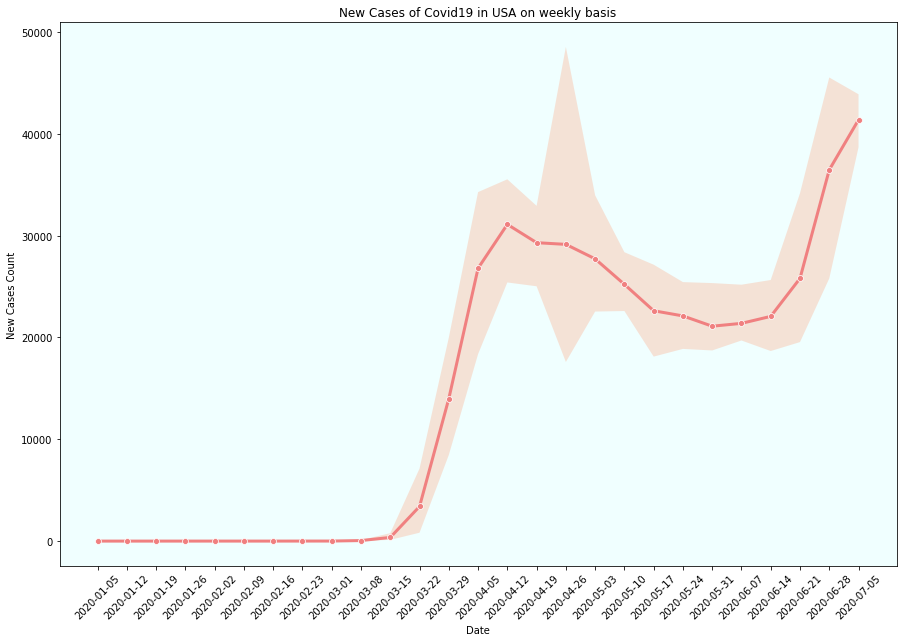

In [195]:
fig, ax = plt.subplots(figsize = (15,10)) 

ax = sns.lineplot(df_week_new_cases.index, df_week_new_cases['mean'], color = 'lightcoral', marker = 'o', linewidth = 3.0) 

ax.fill_between(df_week_new_cases.index, df_week_new_cases['min'], df_week_new_cases['max'],\
                facecolor ='lightsalmon', alpha = 0.3) 

ax.set_facecolor('azure')
ax.xaxis.set(ticks = df_week_new_cases.index, )
ax.tick_params(axis='x', rotation=45)
ax.set(title = "New Cases of Covid19 in USA on weekly basis", ylabel = 'New Cases Count', xlabel = 'Date')

In [218]:
df_age = pd.read_csv('COVID-19_Cases_Summarized_by_Age_Group.csv', parse_dates=['Specimen Collection Date'])\
.drop('Last Updated at', axis =1)


In [254]:
grouped_age = df_age.groupby('Age Group')[['Specimen Collection Date', 'Age Group', 'New Confirmed Cases']]\
.resample('M', on = 'Specimen Collection Date').sum().reset_index()

In [255]:
grouped_age

,Age Group,Specimen Collection Date,New Confirmed Cases
0,18-30,2020-03-31,100
1,18-30,2020-04-30,202
2,18-30,2020-05-31,193
3,18-30,2020-06-30,286
4,31-40,2020-03-31,137
5,31-40,2020-04-30,251
6,31-40,2020-05-31,234
7,31-40,2020-06-30,209
8,41-50,2020-03-31,110
9,41-50,2020-04-30,211


[Text(0, 0.5, 'New Cases Count'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'New Cases of Covid19 in USA on Monthly basis')]

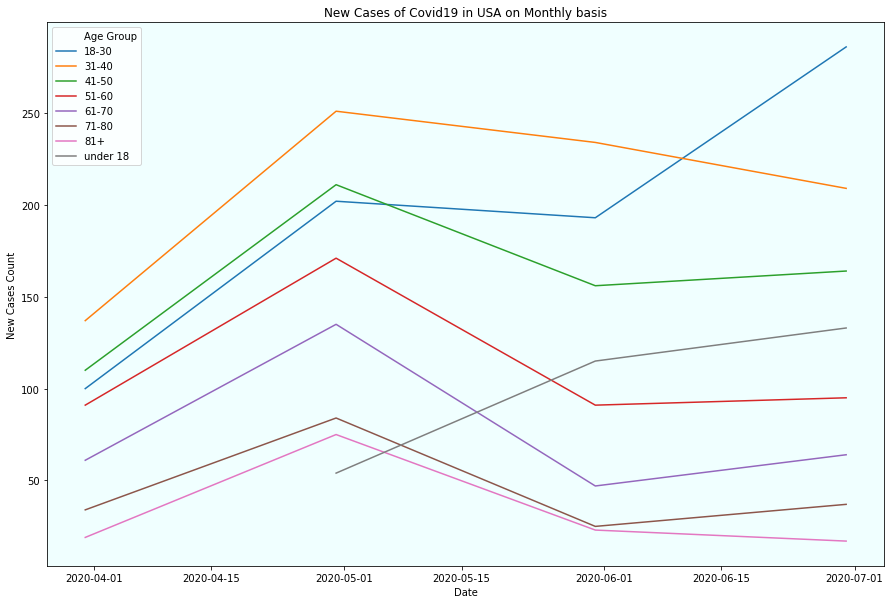

In [256]:
fig, ax = plt.subplots(figsize = (15,10)) 
ax = sns.lineplot(x = 'Specimen Collection Date', y = 'New Confirmed Cases', data = grouped_age, hue = 'Age Group')


ax.set_facecolor('azure')
ax.set(title = "New Cases of Covid19 in USA on Monthly basis", ylabel = 'New Cases Count', xlabel = 'Date')

In [289]:
df3 = pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_Week.csv', parse_dates=['Week ending Date'])\
.drop(['Data as of', 'State'], axis=1).drop(df3[df3['Sex'] == 'All Sex'].index)
df3.head()

,MMWR Week,Week ending Date,Sex,Age Group,Total Deaths,COVID-19 Deaths
0,5,2020-02-01,Female,Under 1 year,185,0
1,5,2020-02-01,Female,1-4 years,28,0
2,5,2020-02-01,Female,5-14 years,48,0
3,5,2020-02-01,Female,15-24 years,146,0
4,5,2020-02-01,Female,25-34 years,328,0


In [290]:
df3['Age Group'].value_counts()

1-4 years            44
5-14 years           44
65-74 years          44
15-24 years          44
55-64 years          44
75-84 years          44
Under 1 year         44
45-54 years          44
25-34 years          44
85 years and over    44
35-44 years          44
Name: Age Group, dtype: int64

In [291]:
age_dict = { "Under 1 year" : "Under 15",
            "1-4 years" : "Under 15",
            "5-14 years" : "Under 15",
            "15-24 years" : "15-24",
            "25-34 years" : "25-34",
            "35-44 years" : "35-44",
            "45-54 years" : "45-54",
            "55-64 years" : "55-64",
            "65-74 years" : "65-74",
            "75-84 years" : "Over 75",
            "85 years and over" : "Over 75"
           }

In [292]:
df3['Age Group'] = df3['Age Group'].map(age_dict)

In [293]:
df3.dtypes

MMWR Week                    int64
Week ending Date    datetime64[ns]
Sex                         object
Age Group                   object
Total Deaths                 int64
COVID-19 Deaths              int64
dtype: object

In [315]:
grouped_age2 = df3.groupby('Sex')[['Week ending Date', 'Age Group', 'Sex', 'COVID-19 Deaths']]\
.resample('M', on = 'Week ending Date').sum().reset_index().pivot_table(index = 'Week ending Date', columns = 'Sex',\
                                                                        values = 'COVID-19 Deaths', aggfunc=sum).apply(lambda x:100 * x / float(x.sum()),\
                                                                                                                       axis =1).round(2)

In [316]:
grouped_age2

Sex,Female,Male
Week ending Date,,
2020-02-29,54.55,45.45
2020-03-31,39.46,60.54
2020-04-30,44.50,55.50
2020-05-31,49.29,50.71
2020-06-30,48.86,51.14


[Text(0, 0.5, 'New Cases Count'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'New Cases of Covid19 in USA on Monthly basis')]

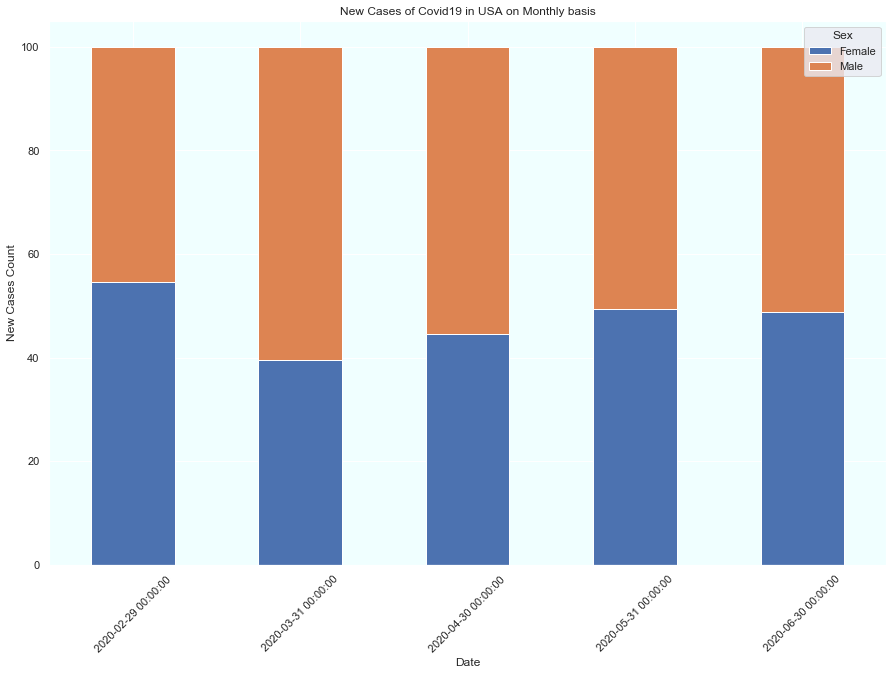

In [323]:
fig, ax = plt.subplots(figsize = (15,10)) 

grouped_age2.plot(kind = 'bar', stacked = 'true', ax = ax)

# ax.xaxis.set(ticks = grouped_age2.index, )
ax.tick_params(axis='x', rotation=45)
ax.set_facecolor('azure')
ax.set(title = "New Cases of Covid19 in USA on Monthly basis", ylabel = 'New Cases Count', xlabel = 'Date')

In [333]:
grouped_sex = df3.groupby('Sex')['COVID-19 Deaths'].sum()

[Text(0.5, 1.0, 'Male to Female Proportion')]

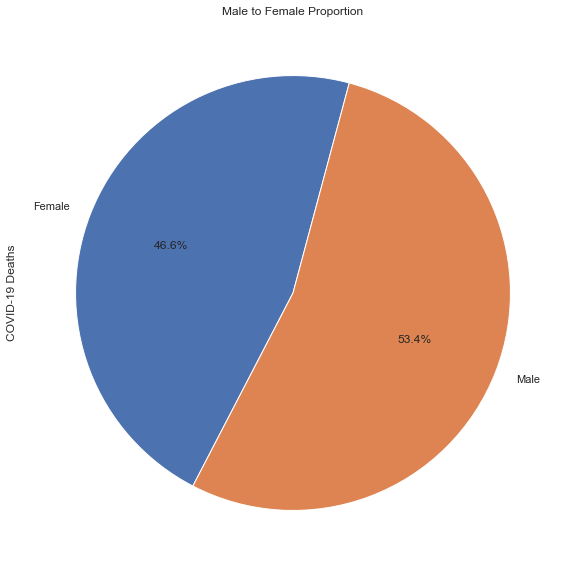

In [344]:
fig, ax = plt.subplots(figsize = (15,10)) 
grouped_sex.plot.pie(y = 'COVID-19 Deaths', x  = 'Sex', autopct='%1.1f%%', startangle=75)
ax.set_facecolor('azure')
ax.set(title = "Male to Female Proportion")

In [346]:
df_state = pd.read_csv('states.csv')

In [349]:
df_state.head()

,Data as of,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Hispanic or Latino,Other,Footnote
0,07/01/2020,United States,Count of COVID-19 deaths,59696.0,25871.0,831.0,5521.0,18797.0,1510.0,NaN
1,07/01/2020,United States,Distribution of COVID-19 deaths (%),53.2,23.1,0.7,4.9,16.7,1.3,NaN
2,07/01/2020,United States,Unweighted distribution of population (%),60.4,12.5,0.7,5.7,18.3,2.4,NaN
3,07/01/2020,United States,Weighted distribution of population (%),42.1,17.1,0.3,10.6,27.9,1.9,NaN
4,07/01/2020,Alabama,Count of COVID-19 deaths,458.0,449.0,NaN,NaN,18.0,NaN,One or more data cells have counts between 1–9...


In [399]:
df_state_clean = df_state.drop(['Data as of', 'Footnote', 'Indicator'], axis = 1)\
.loc[df_state['Indicator'] == 'Count of COVID-19 deaths', :].reset_index(drop = True).fillna(0)

In [400]:
df_state_clean.columns = ['State', 'White', 'Black', 'Native American', 'Asian', 'Hispanic', 'Other']
df_state_clean = df_state_clean.set_index('State').apply(lambda x:100 * x / float(x.sum()), axis =1).round(2).reset_index()
df_state_clean.head()

,State,White,Black,Native American,Asian,Hispanic,Other
0,United States,53.19,23.05,0.74,4.92,16.75,1.35
1,Alabama,49.51,48.54,0.00,0.00,1.95,0.00
2,Arizona,46.70,3.26,21.92,1.35,24.38,2.38
3,Arkansas,56.90,24.57,0.00,0.00,7.76,10.78
4,California,32.27,9.09,0.31,14.93,42.36,1.04


In [401]:
df_state_clean.replace('[<].+','',regex=True, inplace = True)

print(df_state_clean)

                   State   White  Black  Native American  Asian  Hispanic  \
0          United States   53.19  23.05             0.74   4.92     16.75   
1                Alabama   49.51  48.54             0.00   0.00      1.95   
2                Arizona   46.70   3.26            21.92   1.35     24.38   
3               Arkansas   56.90  24.57             0.00   0.00      7.76   
4             California   32.27   9.09             0.31  14.93     42.36   
5               Colorado   62.89   7.83             0.66   3.68     23.55   
6            Connecticut   74.24  14.69             0.00   1.27      9.25   
7               Delaware   71.93  23.68             0.00   0.00      4.39   
8   District of Columbia   11.69  73.47             0.00   1.86     12.99   
9                Florida   50.37  22.08             0.00   1.83     25.73   
10               Georgia   47.14  46.65             0.00   1.61      4.59   
11              Illinois   45.64  27.07             0.17   4.96     21.60   

In [402]:
len(df_state_clean)

44

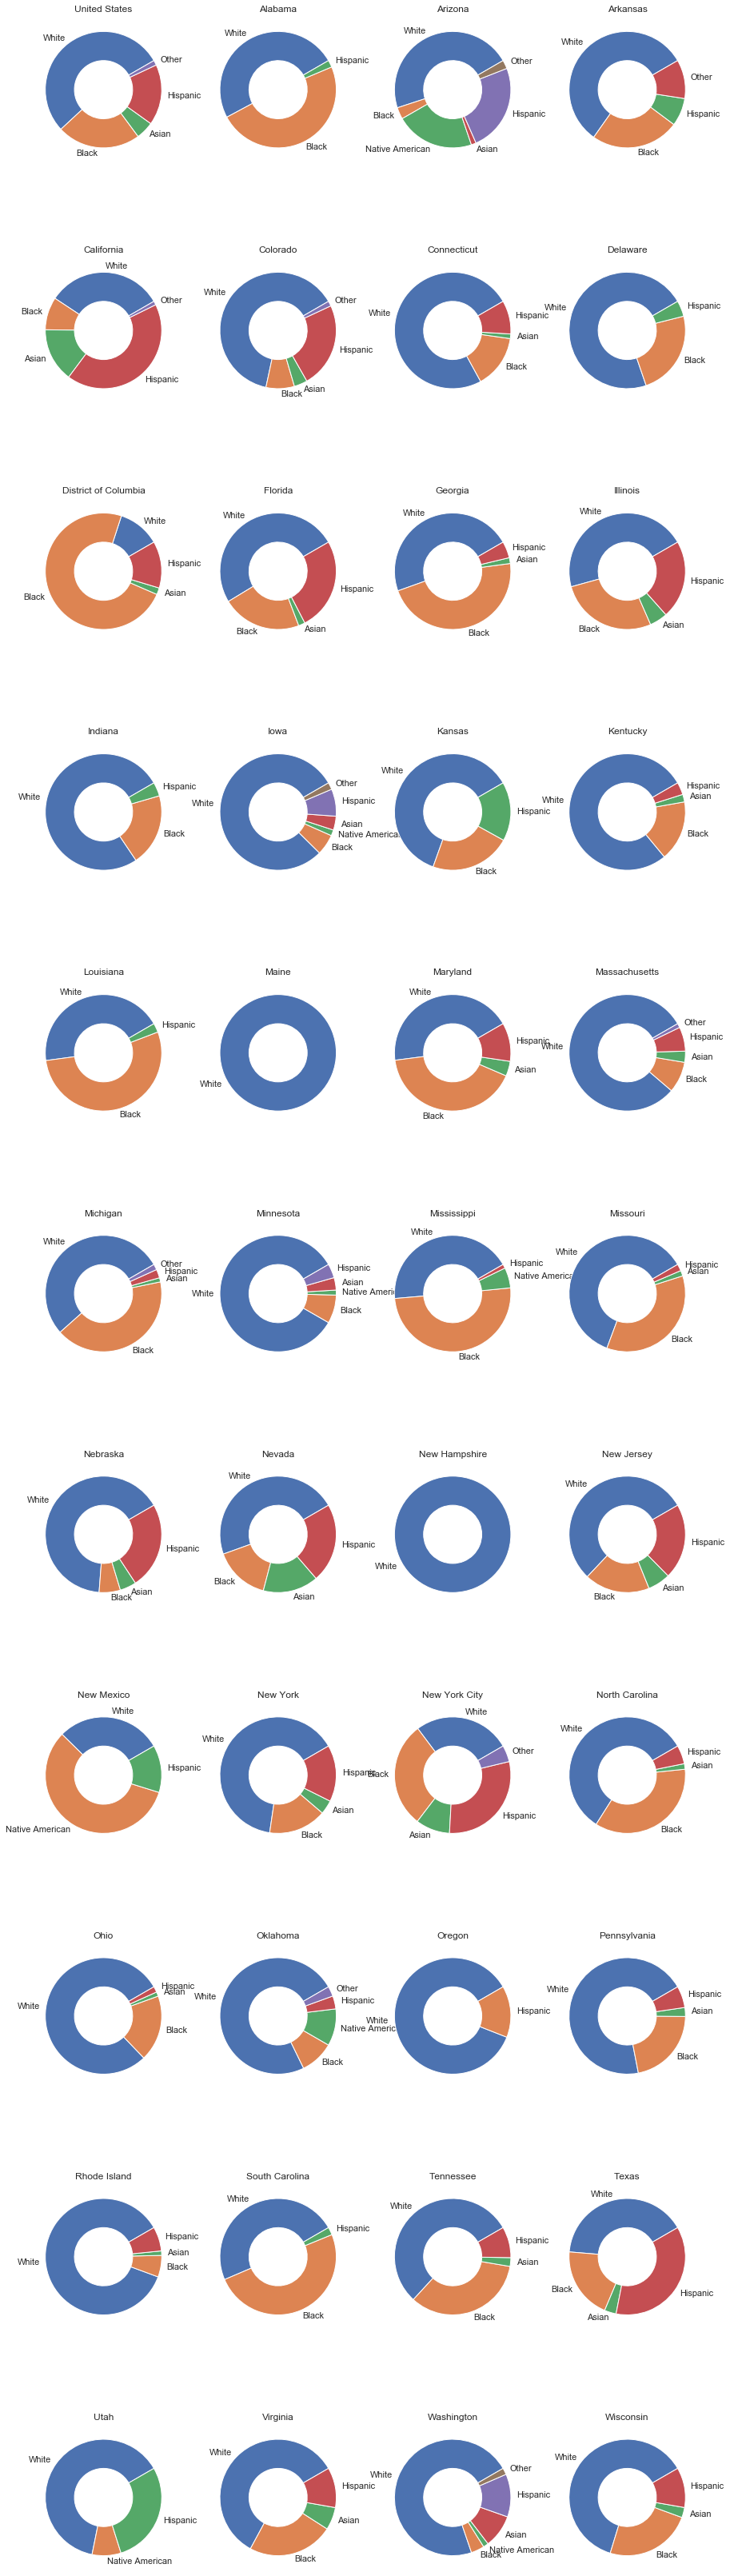

In [407]:
fig, axes = plt.subplots(int(len(df_state_clean)/4), 4, figsize=(15, 60))

for i, (idx, row) in enumerate(df_state_clean.set_index('State').iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, wedgeprops=dict(width=0.5))
    ax.set_title(idx)

fig.subplots_adjust(wspace=.2)